In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
binary_array = np.fromfile("test/inline", dtype=np.uint8)

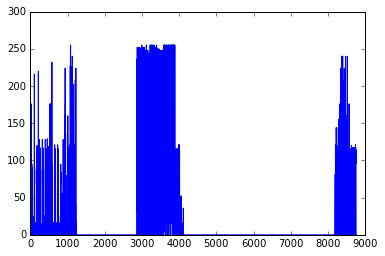

In [11]:
plt.plot(binary_array)

[ 81 131  18 ...,  73  18 131]


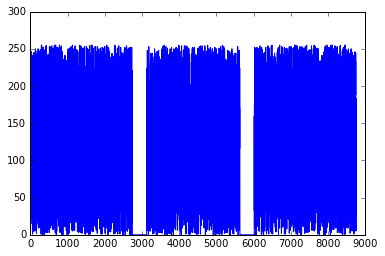

In [8]:
result = np.correlate(binary_array, binary_array, mode="same")
print(result)
plt.plot(result)

The text segment below can be obtained from the binary file directly, on OSX one must [run otool -l filename] to get the loadable table entries (ELF has similar layout), from there in the \__TEXT segment there is a \__text section its "offset" is the offset fromt the start of the file and "size" is the size in hex. Use these values to extract the text section. The extraction can be verified by using [otool -t test/inline] which will print the text section direclty in HEXDUMP

In [20]:
text = binary_array[2864:2864 + 0x3dc]
text_file = open("test/__text", "wb")
text_file.write(text)
text_file.close()

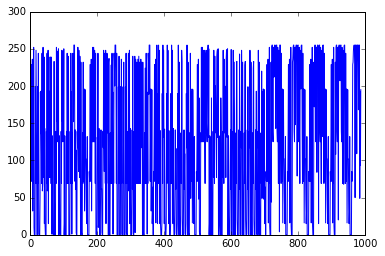

In [22]:
plt.plot(text)

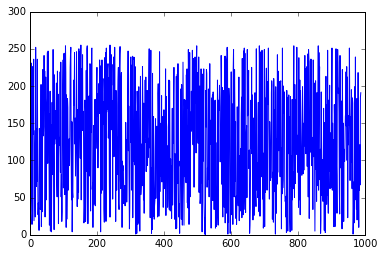

In [28]:
result = np.correlate(text, text, mode="full")
plt.plot(result[result.size//2:])